In [1]:
#https://www.analyticsindiamag.com/what-is-zero-shot-learning/

In [ ]:
zeroshot learning이 되는 이유?
논문 : Learning a Deep Embedding Model for Zero-Shot Learning #https://arxiv.org/pdf/1611.05088.pdf
에서는 
사람은 language knowledge base 가있음


In [ ]:
embedding 이 중요하다함.
-> convolutional layer 구조 뒤에 embedding을 두어 객체를 embedding 해야하는지?

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data

C:\Users\ie-02\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [12]:
len(np.unique(y_train))

10

In [13]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [39]:
x_train = x_train/255.
x_test = x_test/255.

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [60]:
from keras.layers import Input, Dense, Dropout, Activation, Flatten, MaxPooling2D, Conv2D, SeparableConv2D,BatchNormalization
from keras.models import Model

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
import matplotlib.pyplot as plt

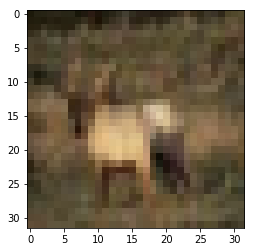

In [26]:
plt.imshow(x_train[3])

In [28]:
len(y_train[3])

10

In [62]:
input_layer = Input(shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3]))
batch_1 = BatchNormalization()(input_layer)
conv_1 = SeparableConv2D(64,(3,3),strides =(1,1),padding='valid',activation= 'relu')(batch_1)
pool_1 = MaxPooling2D((2,2))(conv_1)
batch_2 = BatchNormalization()(pool_1)
conv_2 = SeparableConv2D(64,(3,3),strides =(1,1),padding='valid',activation= 'relu')(batch_2)
batch_3 = BatchNormalization()(conv_2)

flat = Flatten()(batch_3)
dense_1 = Dense(128,activation= 'relu')(flat)
drop_1 = Dropout(0.3)(dense_1)
dense_2 = Dense(len(y_train[0]),activation ='softmax')(drop_1)


In [64]:
model = Model(input_layer, dense_2)
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
separable_conv2d_15 (Separab (None, 30, 30, 64)        283       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
separable_conv2d_16 (Separab (None, 13, 13, 64)        4736      
_________________________________________________________________
batch_normalization_6 (Batch (None, 13, 13, 64)        256       
__________

In [68]:
model.fit(x_train,y_train,shuffle=True)

Epoch 1/1
 3616/50000 [=>............................] - ETA: 4:53 - loss: 0.8231 - acc: 0.7171- ETA: 4:54 - loss: 0.8222 - a

KeyboardInterrupt: 

In [69]:
from keras.layers import Embedding

In [94]:
embedding_input_shape = 32

In [105]:
input_layer = Input(shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3]))
batch_1 = BatchNormalization()(input_layer)
conv_1 = SeparableConv2D(256,(3,3),strides =(1,1),padding='valid',activation= 'relu')(batch_1)
pool_1 = MaxPooling2D((2,2))(conv_1)
batch_2 = BatchNormalization()(pool_1)
conv_2 = SeparableConv2D(256,(3,3),strides =(1,1),padding='valid',activation= 'relu')(batch_2)
batch_3 = BatchNormalization()(conv_2)

flat_1 = Flatten()(batch_3)
dense_1 = Dense(128,activation= 'relu')(flat_1)
drop_1 = Dropout(0.3)(dense_1)
dense_2 = Dense(embedding_input_shape, activation = 'relu')(drop_1)
embedding = Embedding(input_dim = embedding_input_shape,input_length = 32,output_dim = 200)(dense_2)
flat_2 = Flatten()(embedding)
dense_3 = Dense(128, activation = 'relu')(flat_2)
drop_2 = Dropout(0.3)(dense_3)
dense_3 = Dense(len(y_train[0]),activation ='softmax')(drop_2)


In [106]:
model = Model(input_layer, dense_3)
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])

In [108]:
model.fit(x_train,y_train)

ValueError: An operation has `None` for gradient. Please make sure that all of your ops have a gradient defined (i.e. are differentiable). Common ops without gradient: K.argmax, K.round, K.eval.

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
separable_conv2d_43 (Separab (None, 30, 30, 256)       1051      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 15, 15, 256)       1024      
_________________________________________________________________
separable_conv2d_44 (Separab (None, 13, 13, 256)       68096     
_________________________________________________________________
batch_normalization_48 (Batc (None, 13, 13, 256)       1024      
__________